In [216]:
#importing neccessary libraries
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np

In [217]:
#imported the data 
data1=pd.read_csv('ideal.csv')
data2=pd.read_csv('train.csv')
data3=pd.read_csv('test.csv')

In [218]:
#connecting to the sqlite database file using sqlalchemy
database='sqlite:///C:\sqlite\database_space\database1.db'
engine=sqlalchemy.create_engine(database)

In [219]:
#now I will send the data from dataframe to database and create tables in the database
data1.to_sql('ideal_table',con=engine,index=False,if_exists='replace')
data2.to_sql('train_table',con=engine,index=False,if_exists='replace')
data3.to_sql('test_table',con=engine,index=False,if_exists='replace')

100

In [5]:
#in order to further visualization it is comfortable to use dataframes
#so fetching all data from sqlite database for all the 3 table and making it into DataFrames
conn=engine.connect()
value=conn.execute(sqlalchemy.text('SELECT * FROM ideal_table'))
row_values=value.fetchall()
column_values=value.keys()
#ideal table data
ideal=pd.DataFrame(row_values,columns=column_values)

In [6]:
value1=conn.execute(sqlalchemy.text('SELECT * FROM train_table'))
row_values1=value1.fetchall()
column_values1=value1.keys()
#train table data
train=pd.DataFrame(row_values1,columns=column_values1)

In [7]:
value2=conn.execute(sqlalchemy.text('SELECT * FROM test_table'))
row_values2=value2.fetchall()
column_values2=value2.keys()
#test table data
test=pd.DataFrame(row_values2,columns=column_values2)

In [220]:
test.shape

(100, 2)

In [221]:
train.head()

,x,y1,y2,y3,y4
0,-20.0,39.778572,-40.078590,-20.214268,-0.324914
1,-19.9,39.604813,-39.784000,-20.070950,-0.058820
2,-19.8,40.099070,-40.018845,-19.906782,-0.451830
3,-19.7,40.151100,-39.518402,-19.389118,-0.612044
4,-19.6,39.795662,-39.360065,-19.815890,-0.306076


In [222]:
from sklearn.linear_model import LinearRegression

In [223]:
#this class is used to create linear regression and understand the relation between x and y
class Model1():
    def relation_val(self,dataframe,columns):
        b=dataframe
        model=LinearRegression()
        X=np.array(b['x']).reshape(-1,1)
        Y=b['y1']
        c=[]
        for i in range(1,columns+1):
            model.fit(X,np.array(b['y'+'{}'.format(i)]))
            c.append(model.coef_[0])
        return c 

In [224]:
#here used inheritance to get method from Model1

class Comparision_and_errors(Model1):
    #error_value method is used to get mean squared error of the two functions
    def error_value(self,column,train_col_val1):
        n=400
        ideal_col_val='y'+str(column)
        train_col_val='y'+str(train_col_val1)
        d=[(ideal[ideal_col_val][i]-train[train_col_val][i])**2 for i in range(n)]
        return (1/n)*sum(d)
        
#find_ideal_function is used to find similar ideal function for the specified train columns   
    
    def find_ideal_function(self,corr_values_list,comp_val,train_col_val):
        try:
            if comp_val<0:
                for i in corr_values_list:
                    if i<comp_val*0.9 and i>comp_val*1.1:
                        e=self.error_value(corr_values_list.index(i)+1,train_col_val)
                        if e<1:
                            print('for y{3}, y{1} function has {0} correlation value with error {2}'.format(i,corr_values_list.index(i)+1,e,train_col_val))
                    
            else:
                for i in corr_values_list:
                    if i>comp_val*0.9 and i<comp_val*1.1:
                        e=self.error_value(corr_values_list.index(i)+1,train_col_val)
                        if e<1:
                            print('for y{3}, y{1} function has {0} correlation value with error {2}'.format(i,corr_values_list.index(i)+1,e,train_col_val))
        except:
                print('corr_values_list should be given ideal dataset, comp_val(relation value) should be given a number, train_col_val(train column value) value should be greater than 0 and less than or equal to 4')
                
    def other_cases(self,corr_values_list,comp_val,train_col_val):
        try:
            for i in corr_values_list:
                if i>0 and i<comp_val:
                    e=self.error_value(corr_values_list.index(i)+1,train_col_val)
                    if e<0.5:
                        print('for y{3}, y{1} function has {0} correlation value with error {2}'.format(i,corr_values_list.index(i)+1,e,train_col_val))
        except:
            print('corr_values_list should be given ideal dataset, comp_val(relation value) should be given a number, train_col_val(train column value) value should be greater than 0 and less than or equal to 4')
      

In [225]:
a=Comparision_and_errors() 

In [226]:
#here I took the relation between x and y of ideal and train datasets
ideal_correlation_values=a.relation_val(ideal,50)
train_correlation_values=a.relation_val(train,4)

In [227]:
count=1
for i in train_correlation_values:
    a.find_ideal_function(ideal_correlation_values,i,count)
    count=count+1

for y1, y42 function has -2.000067965227639 correlation value with error 0.08561648575842128
for y2, y41 function has 1.998641849284757 correlation value with error 0.08900461731202876
for y3, y11 function has 0.9999999999999994 correlation value with error 0.07465457572540958


In [187]:
a.other_cases(ideal_correlation_values,train_correlation_values[3],4)

for y4, y48 function has 0.0006405201221795135 correlation value with error 0.07990858581863268


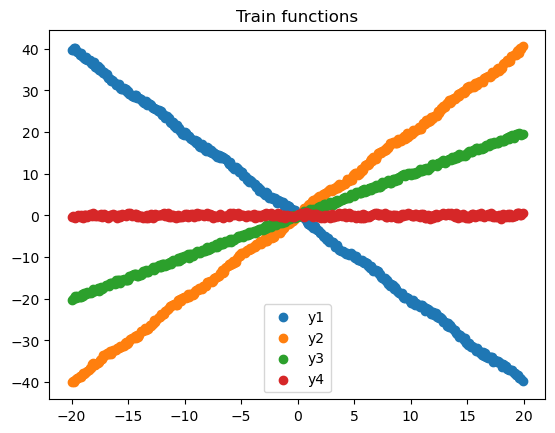

In [228]:
#train dataset
plt.title('Train functions')
plt.scatter(train['x'],train['y1'],label='y1')
plt.scatter(train['x'],train['y2'],label='y2')
plt.scatter(train['x'],train['y3'],label='y3')
plt.scatter(train['x'],train['y4'],label='y4')
plt.legend()

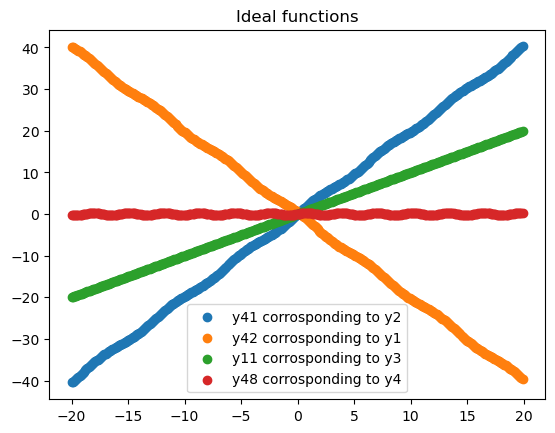

In [230]:
#relevant ideal functions
plt.title('Ideal functions')
plt.scatter(ideal['x'],ideal['y41'],label='y41 corrosponding to y2')
plt.scatter(ideal['x'],ideal['y42'],label='y42 corrosponding to y1')
plt.scatter(ideal['x'],ideal['y11'],label='y11 corrosponding to y3')
plt.scatter(ideal['x'],ideal['y48'],label='y48 corrosponding to y4')
plt.legend()

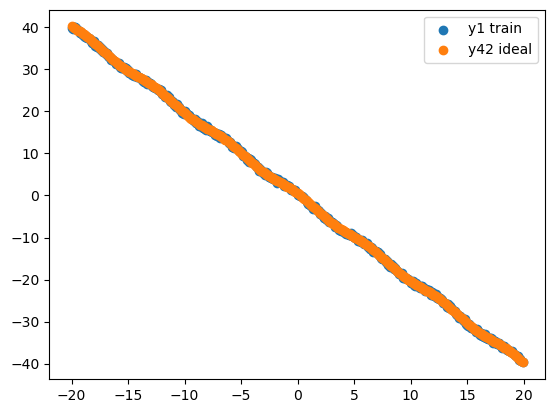

In [231]:
#individual visualization by overlapping training with ideal functions
plt.scatter(train['x'],train['y1'],label='y1 train')
plt.scatter(ideal['x'],ideal['y42'],label='y42 ideal')
plt.legend()

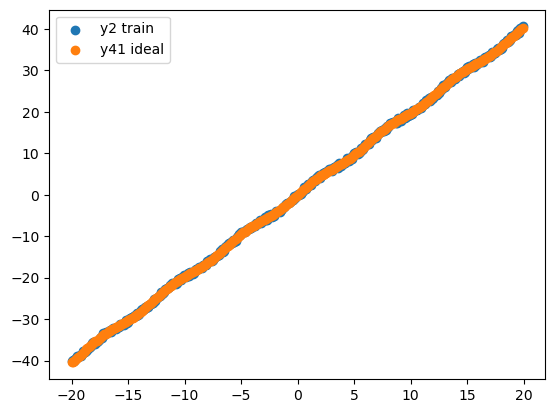

In [232]:
plt.scatter(train['x'],train['y2'],label='y2 train')
plt.scatter(ideal['x'],ideal['y41'],label='y41 ideal')
plt.legend()

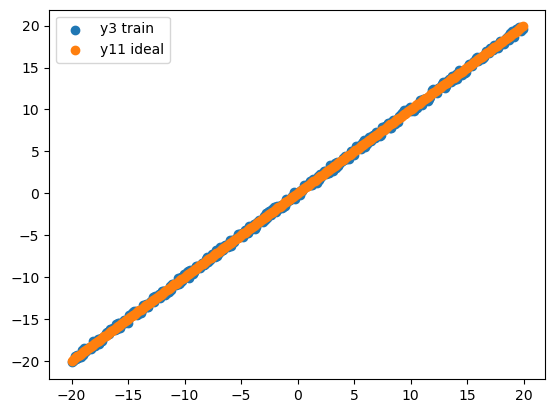

In [234]:
plt.scatter(train['x'],train['y3'],label='y3 train')
plt.scatter(ideal['x'],ideal['y11'],label='y11 ideal')
plt.legend()

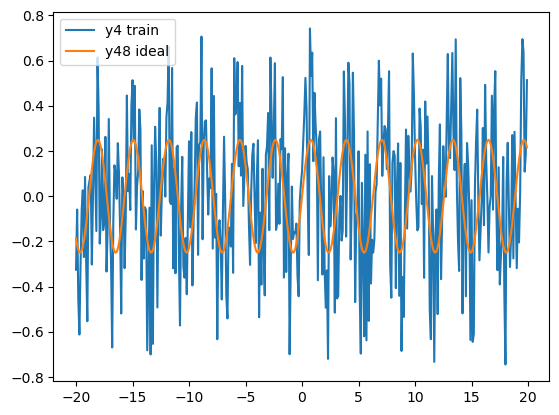

In [236]:
plt.plot(train['x'],train['y4'],label='y4 train')
plt.plot(ideal['x'],ideal['y48'],label='y48 ideal')
plt.legend()